<a href="https://colab.research.google.com/github/sajiniho07/WorkerProductivityPredictorModel/blob/main/worker_productivity_predictor_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [ ]:
# step 1: read data

In [16]:
df = pd.read_csv("/content/garments_worker_productivity.csv")

In [17]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [18]:
df = df.drop(labels=['date',	'quarter',	'department',	'day'], axis=1)
df.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
# step 2: fill nans with mean

In [19]:
df_nans_filled = df.fillna(df.mean())

In [ ]:
# step 3: seprate features

In [20]:
df_y = df_nans_filled[["actual_productivity"]]
df_x = df_nans_filled.drop(labels=["actual_productivity"], axis=1)
print(df_x.shape, df_y.shape)

(1197, 10) (1197, 1)


In [ ]:
# step 4: normalize X datas

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_nrm =  scaler.fit_transform(df_x)

In [ ]:
# step 5: split data to train & test

In [22]:
from sklearn.model_selection  import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_nrm, df_y.values.reshape((-1, )), train_size=0.8)

In [ ]:
# step 6: initialize model callback

In [23]:
from keras.callbacks import EarlyStopping

callBack  = EarlyStopping(patience=5, restore_best_weights=True)

In [ ]:
# step 7: define Dense model

In [68]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=x_train.shape[1:]))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics='accuracy')
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 256)               2816      
                                                                 
 dense_40 (Dense)            (None, 128)               32896     
                                                                 
 dense_41 (Dense)            (None, 64)                8256      
                                                                 
 dense_42 (Dense)            (None, 32)                2080      
                                                                 
 dense_43 (Dense)            (None, 1)                 33        
                                                                 
Total params: 46,081
Trainable params: 46,081
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# step 8: fit model

In [69]:
results = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=callBack)

Epoch 1/100
30/30 [==============================] - 2s 12ms/step - loss: 0.1077 - accuracy: 0.0000e+00 - val_loss: 0.0348 - val_accuracy: 0.0000e+00
Epoch 2/100
30/30 [==============================] - 0s 6ms/step - loss: 0.0294 - accuracy: 0.0000e+00 - val_loss: 0.0297 - val_accuracy: 0.0000e+00
Epoch 3/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0243 - accuracy: 0.0000e+00 - val_loss: 0.0273 - val_accuracy: 0.0000e+00
Epoch 4/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0224 - accuracy: 0.0000e+00 - val_loss: 0.0252 - val_accuracy: 0.0000e+00
Epoch 5/100
30/30 [==============================] - 0s 5ms/step - loss: 0.0196 - accuracy: 0.0000e+00 - val_loss: 0.0247 - val_accuracy: 0.0000e+00
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.0000e+00 - val_loss: 0.0240 - val_accuracy: 0.0000e+00
Epoch 7/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0193 - accuracy: 0.0000e+00 - 

In [ ]:
# step 9: prediction

In [70]:
yhat_test = model.predict(x_test)

8/8 [==============================] - 0s 2ms/step


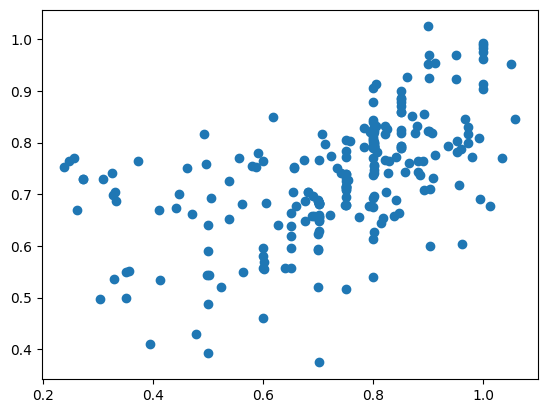

In [71]:
import matplotlib.pyplot as plt

yhat_test = np.reshape(yhat_test, y_test.shape)
plt.scatter(y_test, yhat_test)

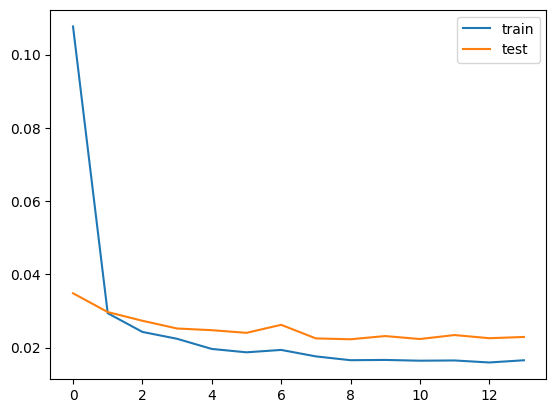

In [72]:
plt.plot(results.history['loss'], label='train')
plt.plot(results.history['val_loss'], label='test')
plt.legend()

In [64]:
model_2 = Sequential()
model_2.add(Dense(128, activation='relu', input_shape=x_train.shape[1:]))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(1, activation='linear'))

model_2.compile(optimizer='adam', loss='mse', metrics='accuracy')

results_2 = model_2.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), callbacks=callBack)

Epoch 1/100
15/15 [==============================] - 2s 30ms/step - loss: 0.2816 - accuracy: 0.0000e+00 - val_loss: 0.0723 - val_accuracy: 0.0000e+00
Epoch 2/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0533 - accuracy: 0.0000e+00 - val_loss: 0.0378 - val_accuracy: 0.0000e+00
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0316 - accuracy: 0.0000e+00 - val_loss: 0.0322 - val_accuracy: 0.0000e+00
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0280 - accuracy: 0.0000e+00 - val_loss: 0.0303 - val_accuracy: 0.0000e+00
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0245 - accuracy: 0.0000e+00 - val_loss: 0.0282 - val_accuracy: 0.0000e+00
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0230 - accuracy: 0.0000e+00 - val_loss: 0.0271 - val_accuracy: 0.0000e+00
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0218 - accuracy: 0.0000e+00 - 

In [65]:
yhat_test_2 = model_2.predict(x_test)

8/8 [==============================] - 0s 2ms/step


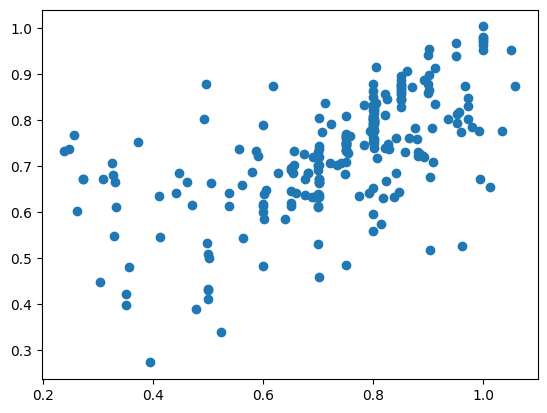

In [66]:
yhat_test_2 = np.reshape(yhat_test_2, y_test.shape)
plt.scatter(y_test, yhat_test_2)

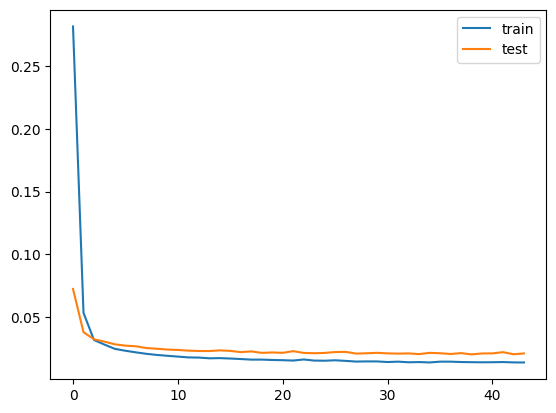

In [67]:
plt.plot(results_2.history['loss'], label='train')
plt.plot(results_2.history['val_loss'], label='test')
plt.legend()

In [74]:
from keras.optimizers import RMSprop
from keras.layers import LeakyReLU

model_3 = Sequential()
model_3.add(Dense(128, activation='relu', input_shape=x_train.shape[1:]))
model_3.add(Dense(64))
model_3.add(LeakyReLU(alpha=0.1))
model_3.add(Dense(32))
model_3.add(LeakyReLU(alpha=0.1))
model_3.add(Dense(1, activation='linear'))

model_3.compile(optimizer=RMSprop(lr=0.001), loss='mse', metrics='accuracy')

results_3 = model_3.fit(x_train, y_train, epochs=100, batch_size=16, validation_data=(x_test, y_test), callbacks=callBack)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


60/60 [==============================] - 1s 5ms/step - loss: 0.1022 - accuracy: 0.0000e+00 - val_loss: 0.0344 - val_accuracy: 0.0000e+00
Epoch 2/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.0000e+00 - val_loss: 0.0332 - val_accuracy: 0.0000e+00
Epoch 3/100
60/60 [==============================] - 0s 2ms/step - loss: 0.0257 - accuracy: 0.0000e+00 - val_loss: 0.0283 - val_accuracy: 0.0000e+00
Epoch 4/100
60/60 [==============================] - 0s 2ms/step - loss: 0.0250 - accuracy: 0.0000e+00 - val_loss: 0.0241 - val_accuracy: 0.0000e+00
Epoch 5/100
60/60 [==============================] - 0s 2ms/step - loss: 0.0233 - accuracy: 0.0000e+00 - val_loss: 0.0322 - val_accuracy: 0.0000e+00
Epoch 6/100
60/60 [==============================] - 0s 2ms/step - loss: 0.0199 - accuracy: 0.0000e+00 - val_loss: 0.0265 - val_accuracy: 0.0000e+00
Epoch 7/100
60/60 [==============================] - 0s 2ms/step - loss: 0.0195 - accuracy: 0.0000e+00 - val_loss: 0.0

In [75]:
yhat_test_3 = model_3.predict(x_test)

8/8 [==============================] - 0s 3ms/step


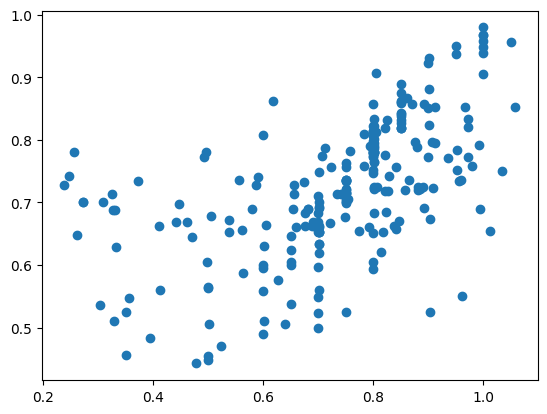

In [76]:
yhat_test_3 = np.reshape(yhat_test_3, y_test.shape)
plt.scatter(y_test, yhat_test_3)

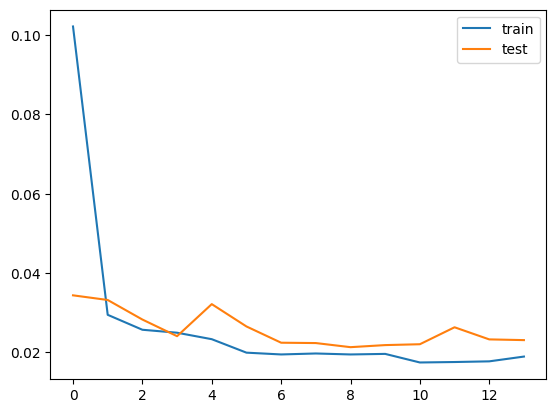

In [77]:
plt.plot(results_3.history['loss'], label='train')
plt.plot(results_3.history['val_loss'], label='test')
plt.legend()

Epoch 1/100
30/30 [==============================] - 2s 8ms/step - loss: 0.1198 - accuracy: 0.0000e+00 - val_loss: 0.0296 - val_accuracy: 0.0000e+00
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0278 - accuracy: 0.0000e+00 - val_loss: 0.0253 - val_accuracy: 0.0000e+00
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.0000e+00 - val_loss: 0.0236 - val_accuracy: 0.0000e+00
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.0000e+00 - val_loss: 0.0230 - val_accuracy: 0.0000e+00
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.0000e+00 - val_loss: 0.0231 - val_accuracy: 0.0000e+00
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0198 - accuracy: 0.0000e+00 - val_loss: 0.0221 - val_accuracy: 0.0000e+00
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.0000e+00 - v

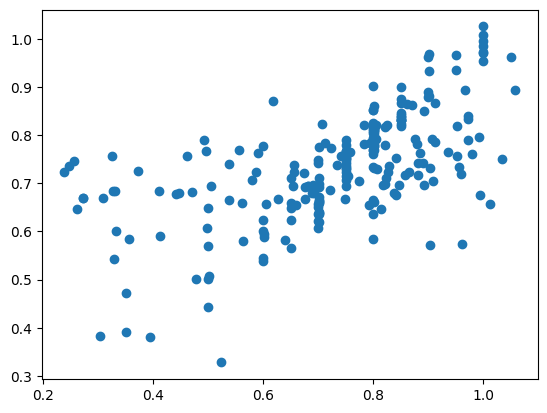

In [61]:
model_4 = Sequential()
model_4.add(Dense(64, activation='relu', input_shape=x_train.shape[1:]))
model_4.add(Dense(32, activation='tanh'))
model_4.add(Dense(16, activation='tanh'))
model_4.add(Dense(8, activation='tanh'))
model_4.add(Dense(1, activation='linear'))

model_4.compile(optimizer='adam', loss='mse', metrics='accuracy')

results_4 = model_4.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), callbacks=callBack)

yhat_test_4 = model_4.predict(x_test)

yhat_test_4 = np.reshape(yhat_test_4, y_test.shape)
plt.scatter(y_test, yhat_test_4)

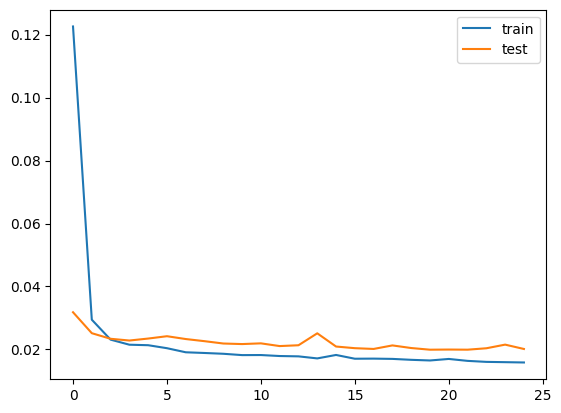

In [59]:
plt.plot(results_4.history['loss'], label='train')
plt.plot(results_4.history['val_loss'], label='test')
plt.legend()

In [63]:
print(yhat_test_4)
print(y_test)

[0.6806088  0.821577   0.89915127 0.89323395 0.7701392  0.5711778
 0.9547005  0.65030664 0.7064654  0.6354277  0.72418976 0.6659658
 0.68526995 0.7166018  0.7048659  0.6697174  0.79440516 0.6806088
 0.7410448  0.74140126 0.72095    0.78886884 0.60619676 0.5807109
 0.6697174  0.67678523 0.81834215 0.748236   0.7893913  0.77937466
 0.6941191  0.77564865 0.6015436  0.7925908  0.742923   0.65833265
 0.8667559  0.7255299  0.68441653 0.73740816 0.64903647 0.7318023
 0.778675   0.81296426 0.7893913  0.7568945  1.0071208  0.8040069
 0.7763946  0.8595941  0.6199244  0.68264216 0.8212468  0.86234117
 0.8311635  0.81468934 0.6952439  0.66753286 0.71186924 0.69932467
 0.89323395 0.735127   0.6956709  0.50699526 0.96685433 0.76988417
 0.38271275 0.9843001  0.8331029  0.6974486  0.47140756 0.8819069
 0.7650487  0.81799674 0.79016376 0.831418   0.7662913  0.7629564
 0.65908265 0.7604495  0.75196296 0.7243763  0.7143879  0.735127
 0.96824425 0.7561254  0.6384266  0.80790865 0.7624957  0.77802444
 0.74